# Disciplina C318 - Data Science and Machine Learning Fundamentals
## Tema: Custo Médio de Tratamentos no Brasil


**Alunos:**
 - **Jônathan Stefan Covelo de Carvalho - GEC 1668**
 - **Letícia Vitória Merss Moreira - GES 56**
 - **Lívia Jacklinne Ramos Moreira - GEC 1731**

----------------------------------------------------------------------------------------------------------------


In [1]:
%pip install summarytools klib scikit-learn plotly streamlit matplotlib pandas_gbq pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
##############################################################################
                 # Importação de bibliotecas e frameworks # 

import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='browser'
template = 'plotly' # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white"
import streamlit as st
import klib
import os
import tarfile
import urllib
import sklearn
import urllib.request
from   summarytools import dfSummary
from   zlib import crc32
from   pathlib import Path
from   google.cloud import bigquery
from   google.oauth2 import service_account
from   summarytools import dfSummary
from   sklearn.model_selection import train_test_split

In [3]:
import pkg_resources
def check_package_version(package_name):
    try:
        version = pkg_resources.get_distribution(package_name).version
        return f"{package_name} version: {version}"
    except pkg_resources.DistributionNotFound:
        return f"{package_name} is not installed"

# Check the version of google-cloud package
package_name = "klib"
print(check_package_version(package_name))

klib version: 1.3.1


In [4]:
# Criando uma matriz chamada tabela com as informações do arquivo cancelamentos.csv
df = pd.read_csv("large_doencas_brasil.csv")

display(df)

print('#################################################################')
print('#################################################################')

print(df.head())

  Nome da Doença   Categoria Região mais Afetada  \
0       HIV/AIDS     Crônica             Sudeste   
1       Diabetes     Crônica               Norte   
2          Gripe  Infecciosa                 Sul   
3    Hipertensão     Crônica                 Sul   
4       HIV/AIDS  Infecciosa        Centro-Oeste   

   Incidência Anual (por 100k hab) Faixa Etária Afetada  Mortalidade (%)  \
0                             1629                Todas            15.19   
1                             1134         Adolescentes             1.93   
2                             2446         Adolescentes             9.92   
3                             4971                Todas             9.63   
4                             2035         Adolescentes             8.78   

   Número de Casos         Tipo de Tratamento  Custo Médio do Tratamento (R$)  \
0           369322  Mudança de Estilo de Vida                           28185   
1           408251                     Vacina                       

In [10]:
# Manter as colunas necessárias para previsão
df = df[['Nome da Doença', 'Região mais Afetada', 'Número de Casos', 'Incidência Anual (por 100k hab)', 'Mortalidade (%)']]

# Convertendo variáveis categóricas (por exemplo, Nome da Doença e Região mais Afetada) em variáveis numéricas
df = pd.get_dummies(df, columns=['Nome da Doença', 'Região mais Afetada'], drop_first=True)

# Verificar os dados transformados
print(df.head())


   Número de Casos  Incidência Anual (por 100k hab)  Mortalidade (%)  \
0           369322                             1629            15.19   
1           408251                             1134             1.93   
2           429944                             2446             9.92   
3           330732                             4971             9.63   
4            46147                             2035             8.78   

   Nome da Doença_Dengue  Nome da Doença_Diabetes  \
0                  False                    False   
1                  False                     True   
2                  False                    False   
3                  False                    False   
4                  False                    False   

   Nome da Doença_Febre Amarela  Nome da Doença_Gripe  \
0                         False                 False   
1                         False                 False   
2                         False                  True   
3                   

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Número de Casos', axis=1)
y = df['Número de Casos']

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Instanciar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
print('Erro Médio Absoluto:', mean_absolute_error(y_test, y_pred))


Erro Médio Absoluto: 117413.8215


### Exploração inicial dos dados

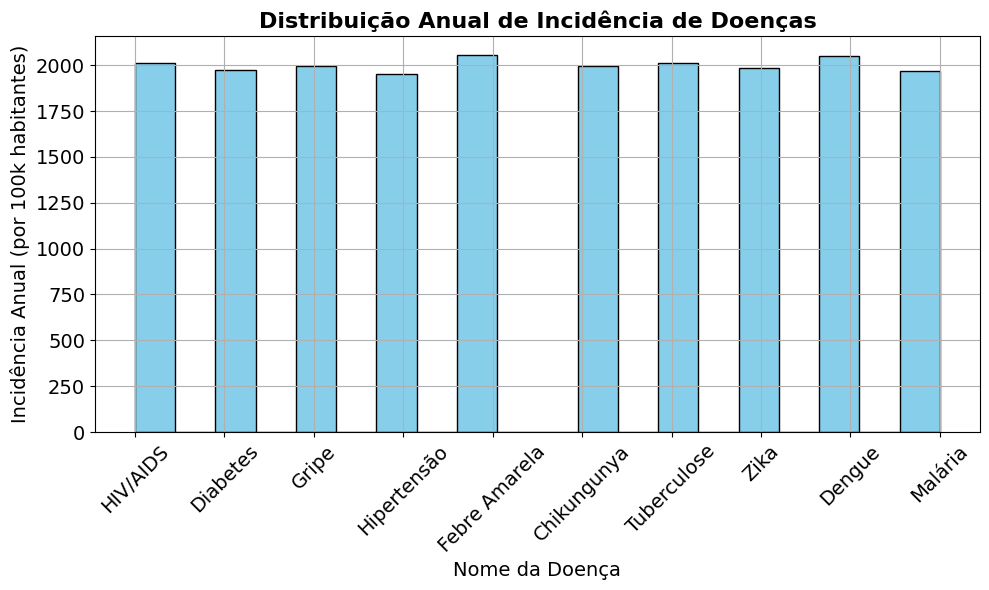

In [34]:
# # Acessando e Manipulando Dataframes com Pandas
# df.info()
# df_describe = df.describe()


# # incidencia = df['Nome da Doença'].value_counts()
# # print(incidencia)

# # Visualizando histogramas relacionados com todas as variáveis do dataframe
# # df.hist(bins=50, figsize=(14,8))
# # plt.show()

# df['Nome da Doença'].hist(bins = 20)
# plt.xlabel('Nome da Doença')
# plt.ylabel('Incidência Anual (por 100k hab)')

# # Análise conduzida a p



# Criando o histograma para a coluna 'Nome da Doença'
df['Nome da Doença'].hist(bins=20, figsize=(10,6), color='skyblue', edgecolor='black')

# Adicionando título e rótulos nos eixos com formatação
plt.title('Distribuição Anual de Incidência de Doenças', fontsize=16, fontweight='bold')
plt.xlabel('Nome da Doença', fontsize=14)
plt.ylabel('Incidência Anual (por 100k habitantes)', fontsize=14)

# Ajustando o tamanho e rotação das marcações dos eixos
plt.xticks(rotation=45, fontsize=14)  # Reduz o tamanho da fonte e rotaciona para 45°
plt.yticks(fontsize=14)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()


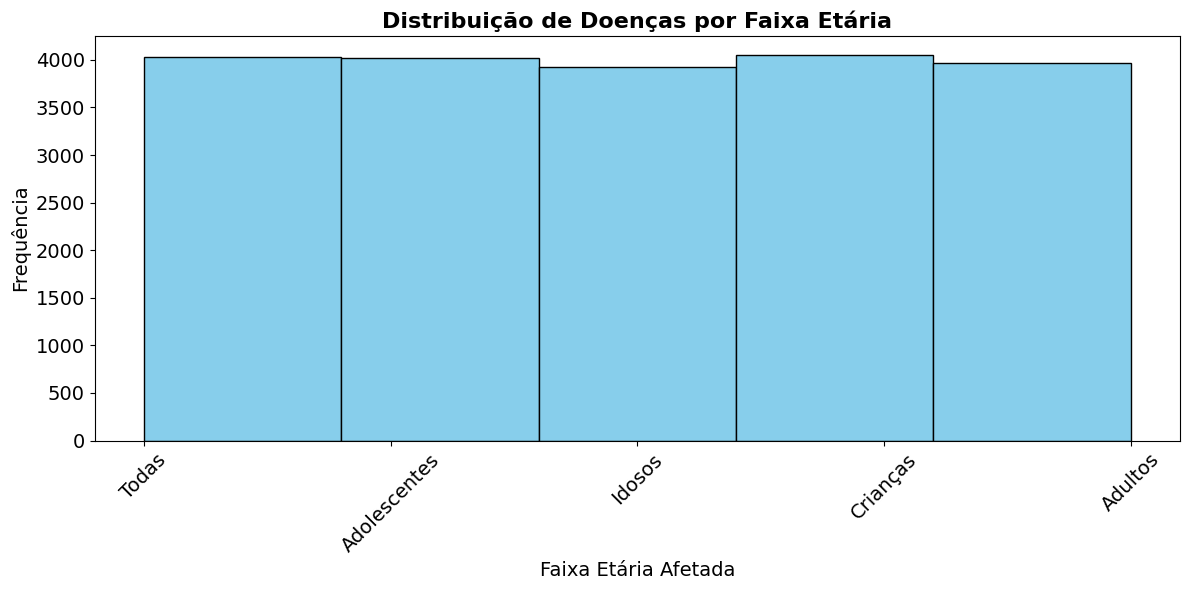

In [37]:
# Criando o histograma
plt.figure(figsize=(12,6))
plt.hist(df['Faixa Etária Afetada'], bins=5, color='skyblue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Distribuição de Doenças por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária Afetada', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Ajustando o tamanho e rotação das marcações dos eixos
plt.xticks(rotation=45, fontsize=14)  # Reduz o tamanho da fonte e rotaciona para 45°
plt.yticks(fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

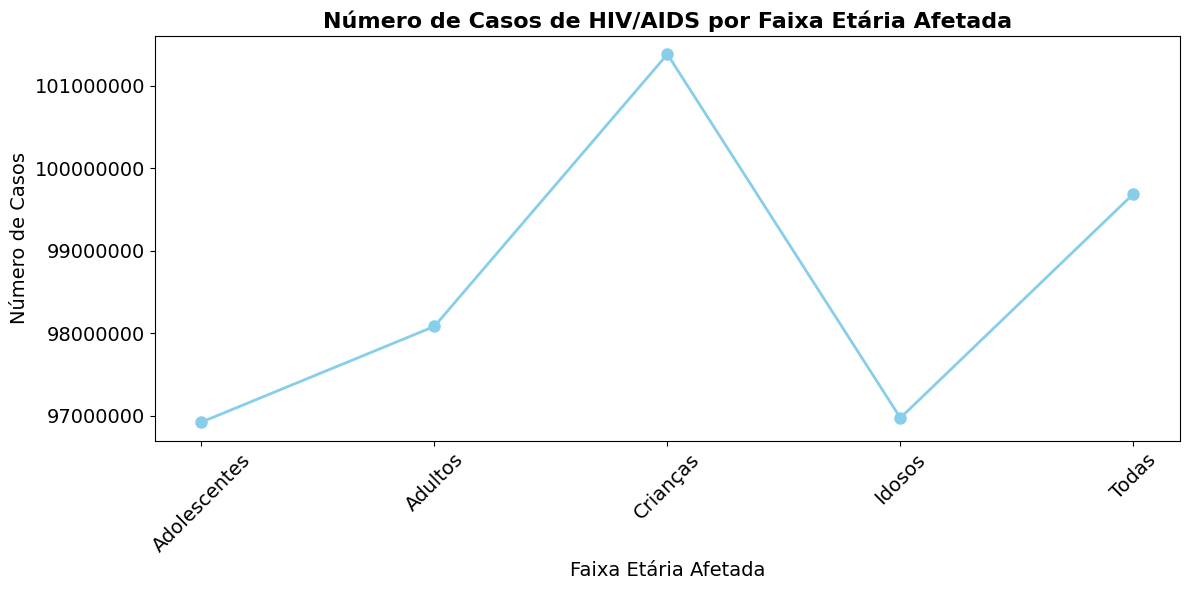

In [39]:





# Filtrar os dados para HIV/AIDS
df_hiv = df[df['Nome da Doença'] == 'HIV/AIDS']
 
# Agrupando o número de casos por faixa etária
faixa_etaria_casos = df_hiv.groupby('Faixa Etária Afetada')['Número de Casos'].sum()
 
# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(faixa_etaria_casos.index, faixa_etaria_casos.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
 
# Removendo a notação científica do eixo Y
plt.ticklabel_format(style='plain', axis='y')
 
# Adicionando título e rótulos
plt.title('Número de Casos de HIV/AIDS por Faixa Etária Afetada', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária Afetada', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
 
# Ajustando o tamanho e rotação das marcações dos eixos
plt.xticks(rotation=45, fontsize=14)  # Rotaciona as categorias no eixo X
plt.yticks(fontsize=14)
 
# Exibindo o gráfico
plt.tight_layout()
 

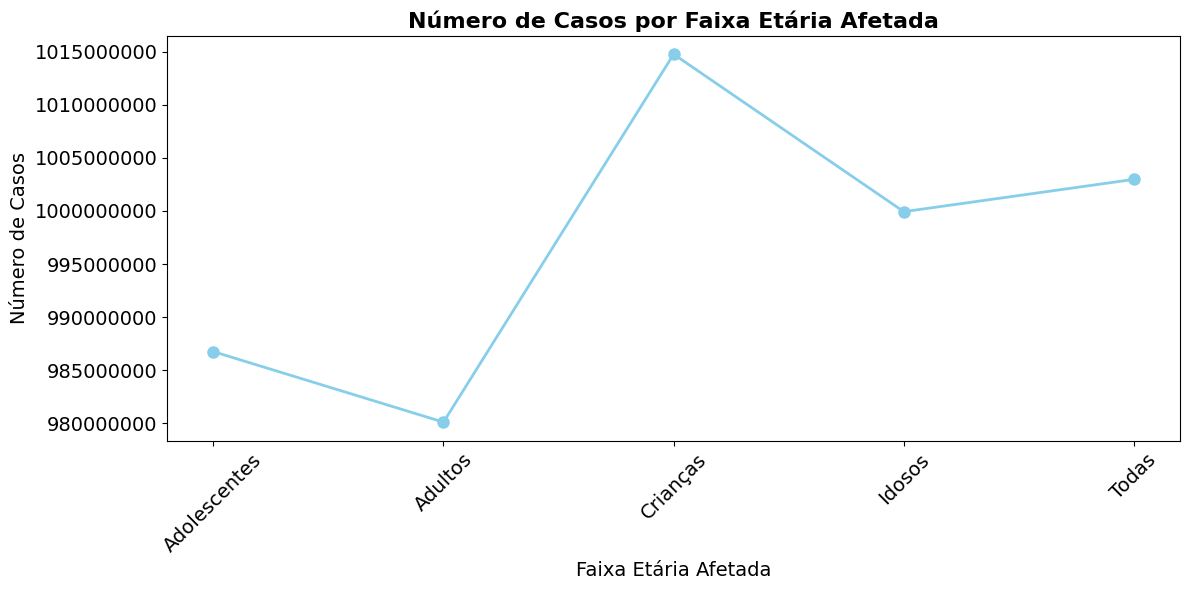

In [41]:
# Agrupando o número de casos por faixa etária
faixa_etaria_casos = df.groupby('Faixa Etária Afetada')['Número de Casos'].sum()

# Criando o gráfico de linhas
plt.figure(figsize=(12,6))
plt.plot(faixa_etaria_casos.index, faixa_etaria_casos.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)

# Removendo a notação científica do eixo Y
plt.ticklabel_format(style='plain', axis='y')

# Adicionando título e rótulos
plt.title('Número de Casos por Faixa Etária Afetada', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária Afetada', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

# Ajustando o tamanho e rotação das marcações dos eixos
plt.xticks(rotation=45, fontsize=14)  # Rotaciona as categorias no eixo X
plt.yticks(fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

1. Previsão da Incidência de Doenças por Região
Pergunta: Quais regiões terão maior aumento de casos de determinadas doenças nos próximos meses ou anos?
Aplicação: Modelos de previsão temporal (time-series forecasting) podem ser utilizados para prever a incidência futura de doenças em diferentes regiões, ajudando órgãos de saúde pública a alocar recursos de maneira mais eficaz.
2. Identificação de Fatores Críticos para Mortalidade
Pergunta: Quais fatores estão mais correlacionados com a alta mortalidade de determinadas doenças?
Aplicação: Utilizando técnicas de análise de correlação ou modelos de classificação (como árvores de decisão ou Random Forest), é possível identificar fatores (como idade, região, tratamento utilizado) que mais contribuem para o aumento da mortalidade de doenças.
3. Segmentação de Pacientes para Tratamentos Específicos
Pergunta: Quais grupos de pacientes têm maior probabilidade de responder a determinados tipos de tratamento?
Aplicação: Algoritmos de agrupamento (clustering), como K-means, podem ser usados para identificar perfis de pacientes que respondem melhor a tipos específicos de tratamentos, ajudando a personalizar intervenções médicas.
4. Previsão de Custo de Tratamento
Pergunta: Qual será o custo médio do tratamento para novos casos de doenças com base nos dados históricos?
Aplicação: Modelos de regressão linear ou árvores de regressão podem ser utilizados para prever o custo de tratamentos futuros com base nos fatores de doença, região e incidência.
5. Risco de Doenças por Faixa Etária
Pergunta: Quais faixas etárias têm maior risco de contrair certas doenças em regiões específicas?
Aplicação: Algoritmos de classificação (como Logistic Regression ou Support Vector Machines) podem prever o risco de desenvolvimento de doenças com base na idade e outros fatores demográficos.
6. Otimização de Alocação de Recursos
Pergunta: Como priorizar a alocação de recursos em regiões e doenças específicas para maximizar a eficiência dos tratamentos?
Aplicação: Técnicas de análise de decisão e modelos preditivos podem ajudar a alocar orçamentos e recursos médicos para áreas e doenças com maior demanda, reduzindo custos e otimizando o impacto.
7. Análise da Eficácia de Tratamentos
Pergunta: Qual tratamento tem maior eficácia em termos de redução de casos e mortalidade?
Aplicação: Algoritmos de classificação e análise de sobrevivência podem ser usados para analisar os resultados de diferentes tipos de tratamentos em termos de sua eficácia em reduzir a mortalidade e a duração da doença.
8. Previsão de Picos Epidêmicos
Pergunta: Quando e onde os próximos picos de doenças infecciosas ocorrerão?
Aplicação: Modelos de previsão epidemiológica podem ser construídos para prever picos de doenças como Dengue e Malária, permitindo uma resposta proativa e medidas de contenção.
9. Análise de Custo-Benefício dos Tratamentos
Pergunta: Quais tratamentos têm o melhor custo-benefício em termos de duração e mortalidade reduzida?
Aplicação: Usando modelos de análise de custo-eficácia com os dados de custo médio e duração de tratamentos, pode-se determinar quais opções de tratamento oferecem o maior benefício econômico e de saúde.
10. Análise de Tendências de Doenças
Pergunta: Quais doenças estão em ascensão e quais estão em declínio em diferentes regiões?
Aplicação: Análise de tendências temporais e classificação de séries temporais pode ser utilizada para identificar quais doenças estão em crescimento ou declínio, ajudando a direcionar campanhas de prevenção.